<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/10_ML_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 및 학습 준비

* 피마 인디언 당뇨병 데이터셋을 사용하여 머신 러닝 알고리즘 실습을 진행하고자 한다.

* 학습을 위해 데이터 전처리를 해야 한다.

* 피마 인디언 데이터셋의 경우 데이터 속성 간 편차가 커서 이를 **스케일링(scaling)**해야 한다.

* 너무 크거나 동떨어진 값을 일정한 범위 안으로 모아 놓는 데이터 전처리 과정이다.

* **StandardScaler()** 함수를 이용하면 된다.

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 1.87 MiB/s, done.
Resolving deltas: 100% (9/9), done.


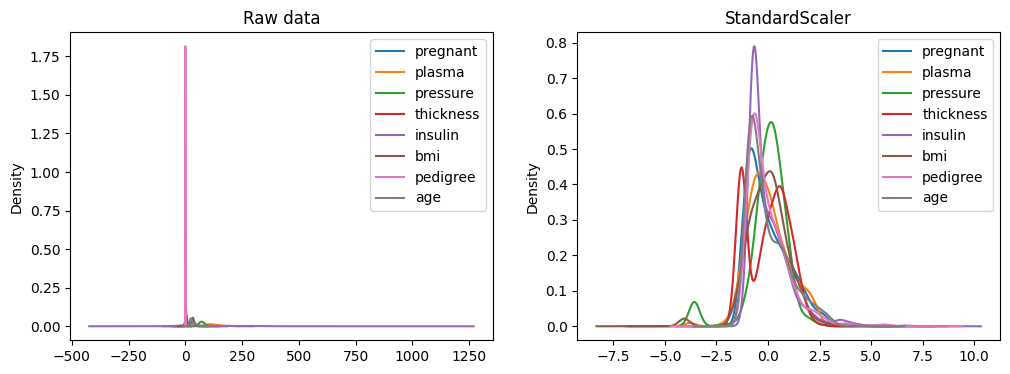

In [2]:
# 라이브러리 호출
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

# 깃허브에 있는 데이터 로드
!git clone https://github.com/taehojo/data.git

# 피마 인디언 당뇨병 데이터셋 로드
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정
X = df.iloc[:, 0:8]

# 당뇨병 여부를 y로 지정
y = df.iloc[:, 8]

# 데이터 스케일링 진행
ss = StandardScaler()

scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

# 데이터 스케일링 전후 비교
fig, ax = plt.subplots(1, 2, figsize=(12,4))

X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])

plt.show()

# 학습 세트와 테스트 세트 분할 (75 : 25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 스케일링 이전의 데이터는 편향된 분포를 보이지만, 스케일링 후 데이터는 0을 중심으로 모여 있음

* 이제 데이터 스케일링(정규화)을 마치고 학습 및 테스트 세트도 준비되었다.

* 적용할 10가지의 알고리즘은 모두 사이킷런을 이용해 실습할 것이다.

* 사이킷런을 이용하는 기본 순서는 다음과 같다.
> 1. 사이킷런 라이브러리에서 적절한 알고리즘을 불러온다.
  2. **fit()** 함수로 학습을 진행한다.
  3. **predict()** 함수로 예측을 진행한다.

# 결정 트리

* **결정 트리(decision tree)**는 스무고개와 비슷한 학습법이다.
> 데이터를 나눌 수 있는 최적의 질문(특성)을 찾는 과정이다.
  * 좋은 분할이란? 비슷한 것들끼리 묶이도록 나누는 것
  * 이때 얼마나 잘 분할되었는가를 평가하는 기준 중 하나가 **지니 불순도(Gini Impurity)**이다.
  * 해당 노드(그룹) 안에 있는 데이터가 서로 얼마나 섞여 있는지를 측정하는 값으로, 특정 노드에서 한 클래스만 존재하면 불순도가 0(완전 깨끗)이고, **여러 클래스가 섞일수록 불순도가 커진다.**
  * 즉 지니 불순도가 낮을수록 좋은 분할인 셈이다.
  * **엔트로피(Entropy)**로도 불순도를 결정 가능하다.
  <br> 엔트로피가 높을수록 데이터가 혼잡하게 섞여있다는 의미이다.

  > 결정트리는 각 노드에서 데이터를 분할할 때, 지니 불순도가 가장 낮아지는 기준을 선택한다.
  * 이를 위해 **불순도 감소량(Information Gain)**을 계산한다.
  * 이 기준을 선택하면, 분할을 반복하며 트리를 확장한다.
  * 모든 노드가 최종 클래스에 도달하면 트리가 완성된다.

* Yes or No로 답할 수 있는 질문을 계속 던져 나가 학습하는 방법이다.

* 예측 결과를 도출한 과정을 시각적으로 설명하기 매우 좋은 알고리즘이다.

In [3]:
# 결정 트리 알고리즘 호출
from sklearn.tree import DecisionTreeClassifier

# 훈련 세트 학습 진행
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

# 테스트 세트로 예측 진행
y_pred = classifier.predict(X_test) # 꼭 먼저 훈련시키고 진행할 것

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True) # 10개의 폴드로 나눔

# 교차 검증을 통한 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 10 폴드의 계층별 교차 검증 사용

# 정확도와 표준편차 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 각 폴드에서 계산된 정확도의 평균
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 각 폴드에서 계산된 정확도의 표준편차

Accuracy: 67.54 %
Standard Deviation: 7.12 %


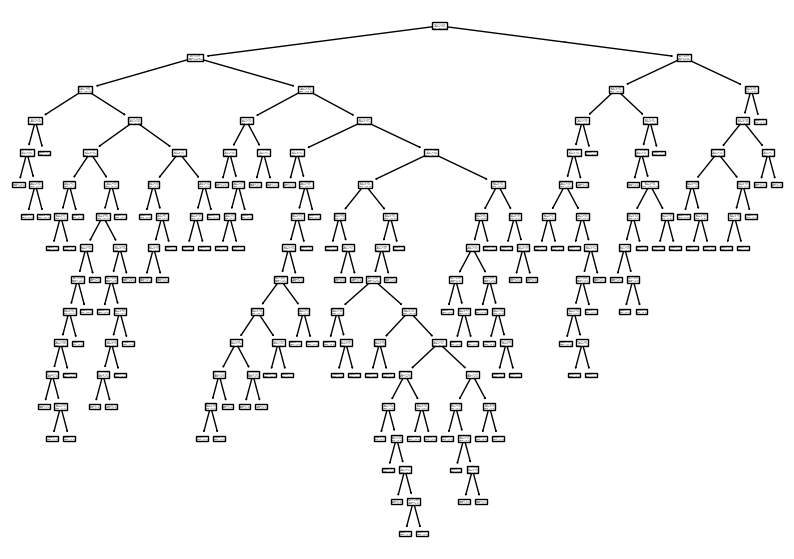

In [5]:
# 결정 트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(classifier)
plt.show()

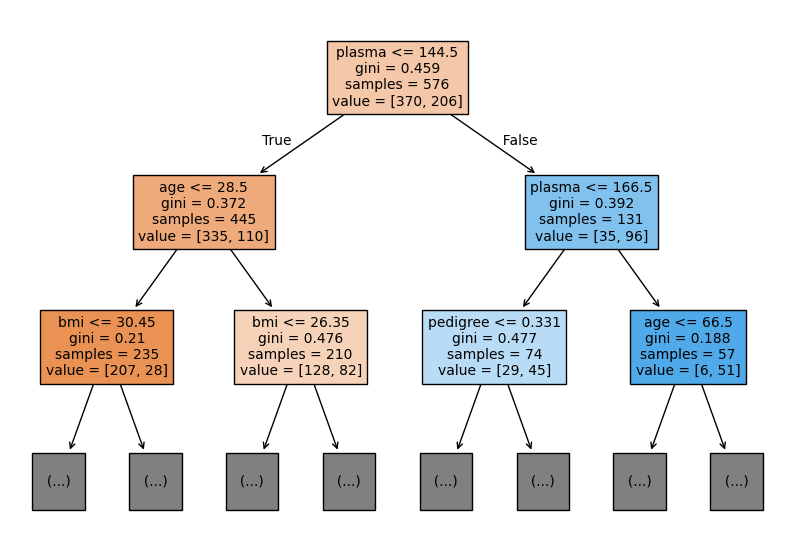

In [11]:
# 트리의 최대 깊이를 2로 제한하여 시각화
plt.figure(figsize=(10,7))
plot_tree(classifier, max_depth=2, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

# 랜덤 포레스트

* **랜덤 포레스트(random forest)**는 결정 트리를 여러 개 묶어 놓은 앙상블 기법이다.
> **앙상블 기법 적용 문제**
  1. 다수결 투표(Majority Voting) - 분류 문제
  2. 평균 내기(Averaging) - 회귀 문제

  **앙상블 기법의 대표적인 종류**
  1. **배깅(Bagging)** - 병렬 학습
  > 대표 알고리즘: 랜덤 포레스트
    * 여러 개의 모델을 만들 때, 데이터를 랜덤하게 샘플링해서 여러 개의 학습 데이터셋을 만든다.
    * 각 모델을 개별적으로 학습하고, 최종 결과는 다수결(분류) 또는 평균(회귀)으로 결정한다.
    * 목적: 모델의 분산(Variance)을 줄여 *과적합을 방지하는 것*

  2. **부스팅(Boosting)** - 순차적 학습
  > 대표 알고리즘: AdaBoost, Gradient Boosting, XGBoost, LightGBM
    * 첫 번째 모델이 학습을 한 후, 틀린 데이터에 더 집중하도록 다음 모델을 학습시킨다.
    * 이렇게 여러 개의 모델을 순차적으로 학습시켜 점점 성능을 개선한다.
    * 마지막에는 모든 모델의 예측을 합쳐서 최종 결과를 만든다.
    * 목적: 학습을 반복하면서 오차(Bias)를 줄이고 *성능을 높이는 것*

* 하나의 결정 트리가 아닌, 많은 수의 결정 트리를 통해 도출한 분류 결과를 취합하여 최종 예측을 하는 알고리즘이다.

* 과적합에 빠지기 쉬운 결정 트리의 단점을 보완해 준다.

In [17]:
# 랜덤 포레스트 알고리즘 호출
from sklearn.ensemble import RandomForestClassifier

# 훈련 진행
classifier1 = RandomForestClassifier(n_estimators=50)

classifier1.fit(X_train, y_train)

# 테스트 세트로 예측 진행
y_pred1 = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies1 = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도 표준편차 출력
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 70.00 %
Standard Deviation: 8.17 %


# 가우시안 나이브 베이즈

* **가우시안 나이브 베이즈(Gaussian Naïve Bayes, GNB)**는 속성이 **연속형 변수(연속형 데이터)**일 때, 베이즈 정리를 기반으로 각 범주에 속할 확률을 계산하는 방법이다.

* 이 알고리즘은 **특성이 정규 분포(가우시안 분포)를 따른다고 가정하고 확률을 계산**한다.

* **나이브(naïve)**란?
<br> - 모든 특성들이 **독립적**이라고 가정하는 것이다.

* **베이즈 정리**란 조건부 확률을 계산하는 방법 중 하나이다.
<br> 이전의 경험과 현재의 정보를 근거로 확률을 구해 가는 방법인 셈이다.

In [19]:
# 가우시안 나이브 베이즈 알고리즘 호출
from sklearn.naive_bayes import GaussianNB

# 훈련 진행
classifier2 = GaussianNB()

classifier2.fit(X_train, y_train)

# 테스트 세트 예측 진행
y_pred2 = classifier2.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통한 정확도 계산
accuracies2 = cross_val_score(estimator=classifier2, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차 출력
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

Accuracy: 75.53 %
Standard Deviation: 5.04 %


# K-최근접 이웃

* **K-최근접 이웃(k_nearest neighbor)**은 새로운 데이터가 입력되면 **가장 가까이 있는 것을 중심으로** 새로운 데이터의 종류를 정해 주는 것이다.

* K의 수를 변경해 가며 새로운 데이터를 예측하는 방법이므로 K 값을 적절히 정하는 것이 가장 중요하다.

In [20]:
# K-최근접 이웃 알고리즘 호출
from sklearn.neighbors import KNeighborsClassifier

# 훈련 진행
classifier3 = KNeighborsClassifier()

classifier3.fit(X_train, y_train)

# 테스트 세트 예측 진행
y_pred3 = classifier3.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통한 정확도 계산
accuracies3 = cross_val_score(estimator=classifier3, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차 출력
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))

Accuracy: 70.65 %
Standard Deviation: 3.06 %


# 에이다 부스트

* **에이다 부스트(ada boost)**는 여러 번의 분류를 통해 정답을 예측해 가는 **순차적 학습** 알고리즘이다.

* 처음 분류를 통해 도출한 오답에 가중치를 두고 다시 반복 분류하여 정답을 예측하는 방법이다.

In [21]:
# 에이다 부스트 알고리즘 호출
from sklearn.ensemble import AdaBoostClassifier

# 학습 환경 설정
classifier4 = AdaBoostClassifier()

classifier4.fit(X_train, y_train)

# 테스트 세트 예측 진행
y_pred4 = classifier4.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통한 정확도 계산
accuracies4 = cross_val_score(estimator=classifier4, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차 출력
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))

Accuracy: 75.70 %
Standard Deviation: 5.17 %


# 이차 판별 분석

* **이차 판별 분석(quadratic discriminant analysis)**은 각 클래스 간의 경계를 결정해 분류하는 방법이다.

* 만약 이 경계가 직선이면 선형 판별 분석, 2차 방정식의 곡선이면 이차 판별 분석이 된다.

* 이차 판별 분석은 선형 분류보다 더 많은 데이터가 필요하고 연상량도 많지만, 비선형 분류가 가능한 장점이 있다.

In [22]:
# 이차 판별 분석 알고리즘 호출
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 훈련 진행
classifier5 = QuadraticDiscriminantAnalysis()

classifier5.fit(X_train, y_train)

# 테스트 세트 예측 진행
y_pred5 = classifier5.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통한 정확도 계산
accuracies5 = cross_val_score(estimator=classifier5, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차 출력
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))

Accuracy: 73.25 %
Standard Deviation: 6.04 %


# 서포트 벡터 머신

* **서포트 벡터 머신(support vector machine)**은 분류를 위한 기준선을 정의하는 모델이다.
> **마진(Margin)**이 최대가 되는 **초평면(Hyperplane)**을 찾는 것이 핵심이다.

  >> 초평면이란?
  * 데이터를 분류하는 **결정 경계(Decision Boundary)**이다.
  * 쉽게 말해 두 개 이상의 클래스를 나누는 선(or 면)을 의미한다.
  * ex) 2차원의 결정 경계는 직선, 3차원은 평면, 4차원 이상은 초평면

  >> 마진이란?
  * 초평면에서 가장 가까운 데이터(서포트 벡터)와의 거리이다.
  * 마진이 클수록 일반화 성능이 좋다.
  <br> - 마진이 작으면 초평면이 데이터에 너무 가까워져 새로운 데이터를 잘 분류하지 못할 확률이 높아짐 (과적합 위험)

  >> 서포트 벡터란?
  * 초평면에서 가장 가까운 데이터 포인트들이다.
  * 즉, 마진 경계에 위치한 데이터 포인트들이다.

In [23]:
# 서포트 벡터 머신 알고리즘 호출
from sklearn.svm import SVC

# 선형 SVM 훈련 진행
classifier6 = SVC(kernel='linear')

classifier6.fit(X_train, y_train)

# 테스트 세트 예측 진행
y_pred6 = classifier6.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통한 정확도 계산
accuracies6 = cross_val_score(estimator=classifier6, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차 출력
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))

Accuracy: 75.51 %
Standard Deviation: 4.11 %


# 서포트 벡터 머신 - RBF 커널

* **RBF 커널(radial basis functions kernel)**주어진 데이터가 **선형으로 분리될 수 없는 경우**를 해결하기 위해 만들어졌다.

* 커널이란 주어진 데이터를 고차원의 공간으로 새롭게 위치시켜 주는 방법이다.

* 즉 차원을 새롭게 위치시켜 마진 경계를 구하는 것이다.

In [24]:
# 비선형 SVM 훈련 진행
classifier7 = SVC(kernel='rbf') # rbf 커널 선택

classifier7.fit(X_train, y_train)

# 테스트 세트 예측 진행
y_pred7 = classifier7.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통한 정확도 계산
accuracies7 = cross_val_score(estimator=classifier7, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차 출력
print("Accuracy: {:.2f} %".format(accuracies7.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies7.std()*100))

Accuracy: 74.65 %
Standard Deviation: 5.05 %


# 보팅

* **보팅(Voting)**이란 여러 가지 다른 유형의 알고리즘을 같은 데이터셋에 적용해 학습하는 방법이다.

* 이름처럼 다양한 알고리즘을 활용하여 학습한 결과를 모아
<br> 다수의 분류기가 결정한 결과를 선택하거나 클래스별 평균을 종합해 예측한다.

* 앙상블 기법 중 하나이다.

* 앞서 나온 에이다 부스트, 랜덤 포레스트, SVM을 활용해 보팅해보자.

In [27]:
# 보팅 알고리즘 호출
from sklearn.ensemble import VotingClassifier

# 다양한 분류기를 통한 훈련 진행
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

classifier8 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])

classifier8.fit(X_train, y_train)

# 테스트 세트 예측 진행
y_pred8 = classifier8.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통한 정확도 계산
accuracies8 = cross_val_score(estimator=classifier8, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차 계산
print("Accuracy: {:.2f} %".format(accuracies8.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies8.std()*100))

Accuracy: 74.84 %
Standard Deviation: 5.63 %


# 배깅

* **배깅(bagging)**은 앙상블 기법 중 하나로, 데이터 세트를 여러 개로 분리해 분류를 실행하는 방법이다.

* **Bootstrap Aggregating**이라고도 불린다.
> * 분류기를 n번 반복해 학습한다면 그때마다 훈련 세트, 데이터 세트를 새롭게 만든다.
  * 이때 **부트스트랩(bootstrap)** 기법을 사용한다.
  * 부트스트랩이란 훈련 세트와 테스트 세트를 설정 기준에 따라 랜덤으로 선택해 만들어 주는 방법이다.
  * 즉, **중복을 허용한 데이터 샘플링 방식**인 셈이다.

* 보팅과의 차이점은 하나의 알고리즘만을 사용한다는 것이다.

* 부스팅과의 차이점은 각 분류기를 제각각 따로따로 분류한다는 것이다.

* 배깅 방식은 단일 분류기를 여러 번 사용함으로써(**병렬 학습**)
<br> **정확도를 높이고 분산을 줄여 과적합을 방지**하는 효과가 있다.


In [36]:
# 배깅 알고리즘 호출
from sklearn.ensemble import BaggingClassifier

# SVC를 이용한 훈련 진행
clf4 = SVC(kernel='rbf')

classifier9 = BaggingClassifier(estimator=clf4, n_estimators=10) # 10번 훈련 반복

classifier9.fit(X_train, y_train)

# 테스트 세트 예측 진행
y_pred9 = classifier9.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통한 정확도 계산
accuracies9 = cross_val_score(estimator = classifier9, X = X_train, y = y_train, cv = skf)

# 정확도와 표준편차를 출력합니다.
print("Accuracy: {:.2f} %".format(accuracies9.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies9.std()*100))

Accuracy: 74.62 %
Standard Deviation: 5.50 %


Mean accuracy of D_tree : 65.09 %
Mean accuracy of RF : 74.31 %
Mean accuracy of GNB : 75.15 %
Mean accuracy of KNN : 71.16 %
Mean accuracy of Ada : 75.00 %
Mean accuracy of QDA : 74.46 %
Mean accuracy of SVM_l : 74.30 %
Mean accuracy of SVM_k : 72.24 %
Mean accuracy of Voting : 73.61 %
Mean accuracy of Bagging : 75.52 %


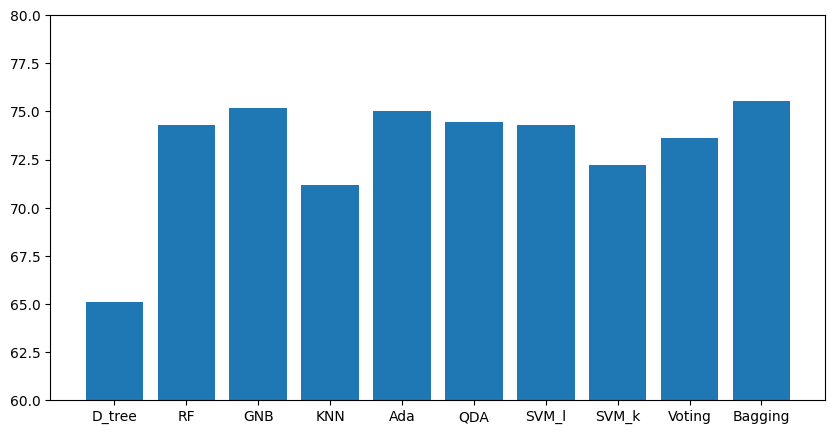

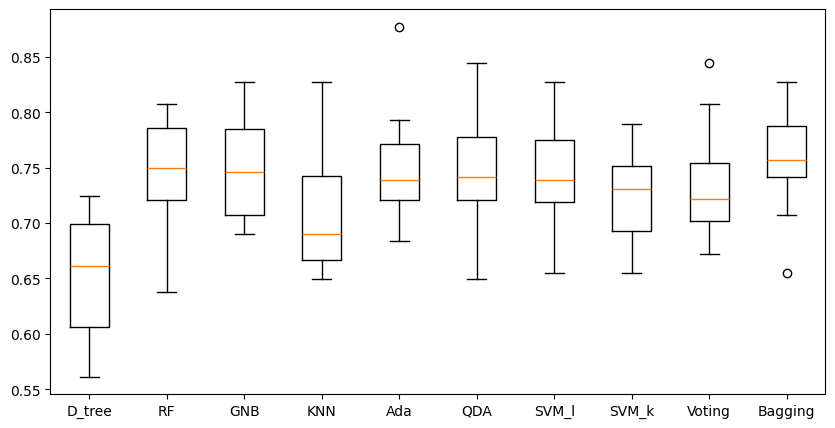

In [38]:
# 여러 알고리즘의 성능 비교하기

# 사용할 알고리즘(분류기) 모두 지정
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                            ('2', RandomForestClassifier()),
                                            ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(estimator=clf3, n_estimators=10, random_state=0)
              ]

# 각 알고리즘의 이름 지정
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                   ]

# 결과가 저장될 리스트 새성
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 알고리즘을 실행하여 결과 저장
classifier_data=zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:

    # 계층별 교차 검증 환경 설정
    skf=StratifiedKFold(n_splits=10, shuffle=True)

    # 교차 검증을 통한 정확도 계산
    accuracies=cross_val_score(classifier, X = X_train, y = y_train, cv = skf)

    # 정확도 평균값 출력
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))

    # 결과 저장
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

# 각 알고리즘별 정확도 평균값을 막대 그래프로 시각화
plt.figure(figsize=(10,5))
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);

# 각 알고리즘별 결과를 Box 그래프로 시각화
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()